In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Fig5b

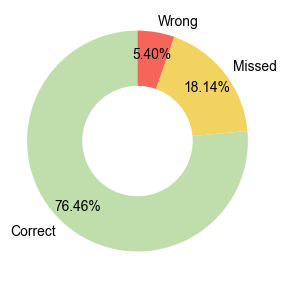

In [2]:

rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42
# 数据及标签
labels = ['Correct', 'Missed', 'Wrong']
sizes = [5069, 1203, 358]
colors = ['#C0DEAB', '#F3D35F', '#F6655A']  # 可根据需要调整颜色

# 创建饼图
fig, ax = plt.subplots(figsize=(3, 3))
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels, 
    autopct='%1.2f%%', 
    startangle=90, 
    colors=colors, 
    pctdistance=0.8 # 调整百分比文本到中心的距离
)

# 在饼图中心绘制一个白色圆形，形成镂空效果
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
ax.add_artist(centre_circle)

# 保证饼图为正圆形
ax.axis('equal')
plt.tight_layout()
plt.savefig('Fig5b.pdf', dpi=300, bbox_inches='tight', transparent=True, format='pdf')   
plt.show()


# Fig5c

In [3]:
df5c = pd.read_csv('Fig5c.csv',index_col=0)

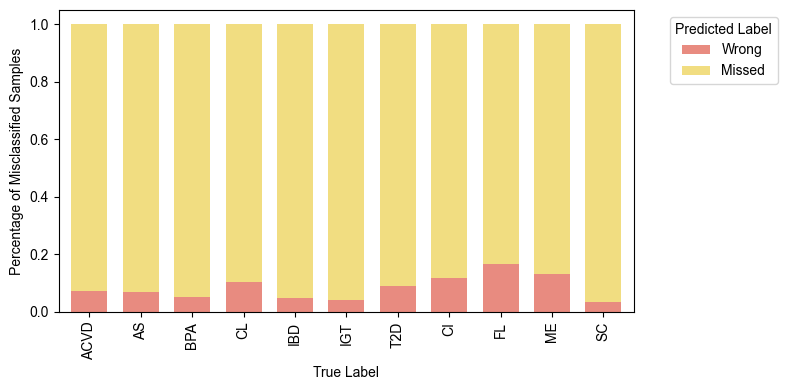

In [4]:
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42

custom_colors = {
    "Missed": "#f1dd81",  # 蓝色
    "Wrong": "#e88b80",  # 橙色
}
# 按照 cm_plot.columns的顺序提取颜色列表
color_list = [custom_colors[col] for col in df5c.columns]

fig, ax = plt.subplots(figsize=(8,4))
df5c.plot(kind='bar', stacked=True, ax=ax, color=color_list,width = 0.7)

ax.set_xlabel('True Label')
ax.set_ylabel('Percentage of Misclassified Samples')
#ax.set_title('Stacked Bar Chart of Misclassification Counts (Diagonal Removed)')
plt.legend(title='Predicted Label', bbox_to_anchor=(1.05, 1), loc='upper left')
#ax.set_xticks(a)
plt.tight_layout()
plt.savefig('./Fig5c.pdf', dpi=300, bbox_inches='tight', transparent=True, format='pdf')  
plt.show()

# Fig 5d

In [5]:
Fig5d = pd.read_csv('./Fig5d.csv',index_col=0)

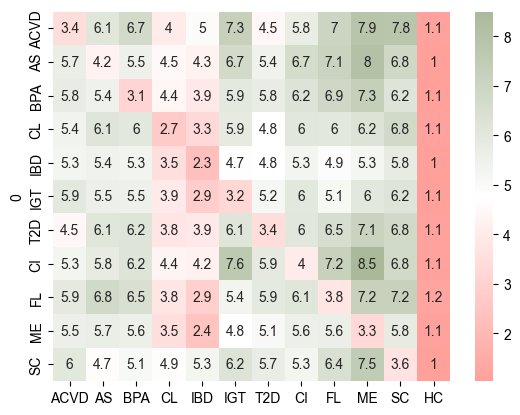

In [6]:
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42
custom_cmap3 = mcolors.LinearSegmentedColormap.from_list(
    "custom_cmap3", ["#FFA09B",'#FFFFFF','#AAB99A']
)
sns.heatmap(Fig5d,annot=True, cmap=custom_cmap3)
plt.savefig('./Fig5d.pdf', dpi=300, bbox_inches='tight', transparent=True, format='pdf')  
plt.show()

# Fig5e

In [7]:
df5e = pd.read_csv('Fig5e.csv')

In [8]:
df5e

,Category,Cross validation,Internal validation
0,top1,0.764555,0.741247
1,top2,0.912821,0.908625
2,top3,0.955958,0.952178


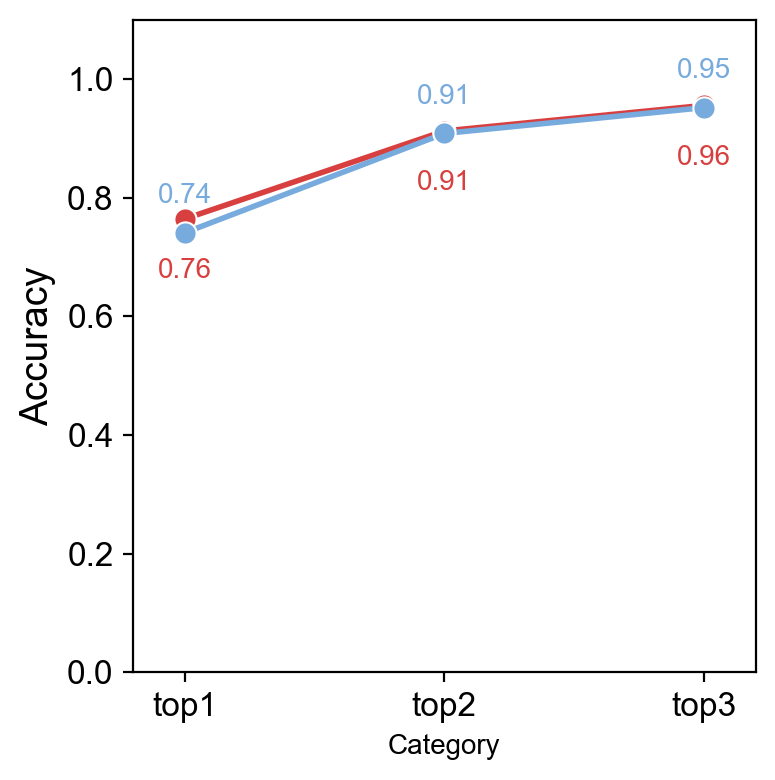

In [9]:
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42
plt.figure(figsize=(4, 4), dpi=200)

edge_color = 'black'  # 柱子边框颜色


ax = sns.lineplot(
    x='Category',
    y='Cross validation',
    data=df5e,
    color='#D84040',
    linewidth=2,  # 设置线宽
    marker='o',  # 添加点标记
    markersize=8
)

ax2 = sns.lineplot(
    x='Category',
    y='Internal validation',
    data=df5e,
    color='#77AADD',
    linewidth=2,  # 设置线宽
    marker='o',  # 添加点标记
    markersize=8
)

for i, row in df5e.iterrows():
    ax.text(
        x=row['Category'],  # x 坐标
        y=row['Cross validation'] - 0.1,  # y 坐标，略高于数据点
        s=f"{row['Cross validation']:.2f}",  # 格式化数值，保留两位小数
        ha='center',  # 水平对齐方式
        fontsize=10,  # 字体大小
        color='#D84040',  # 注释颜色

    )

for i, row in df5e.iterrows():
    ax.text(
        x=row['Category'],  # x 坐标
        y=row['Internal validation'] + 0.05,  # y 坐标，略高于数据点
        s=f"{row['Internal validation']:.2f}",  # 格式化数值，保留两位小数
        ha='center',  # 水平对齐方式
        fontsize=10,  # 字体大小
        color='#77AADD',  # 注释颜色

    )


    
# 调整坐标轴字体大小
plt.ylim(0, 1.1)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)  # 调整x轴刻度字体大小
plt.yticks(fontsize=12)  # 调整y轴刻度字体大小

# 显示图表

plt.tight_layout()
plt.xlim(-0.2, len(df5e) - 0.8)
plt.savefig('Fig5e.pdf', dpi=300, bbox_inches='tight', transparent=True, format='pdf')
plt.show()

